In [ ]:
# @title MIT License

'''
Copyright (c) 2021 Nicholas Kluge

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
'''



# Classificação de Manobras de Skate (Acelerometria + Aprendizagem de Máquina)

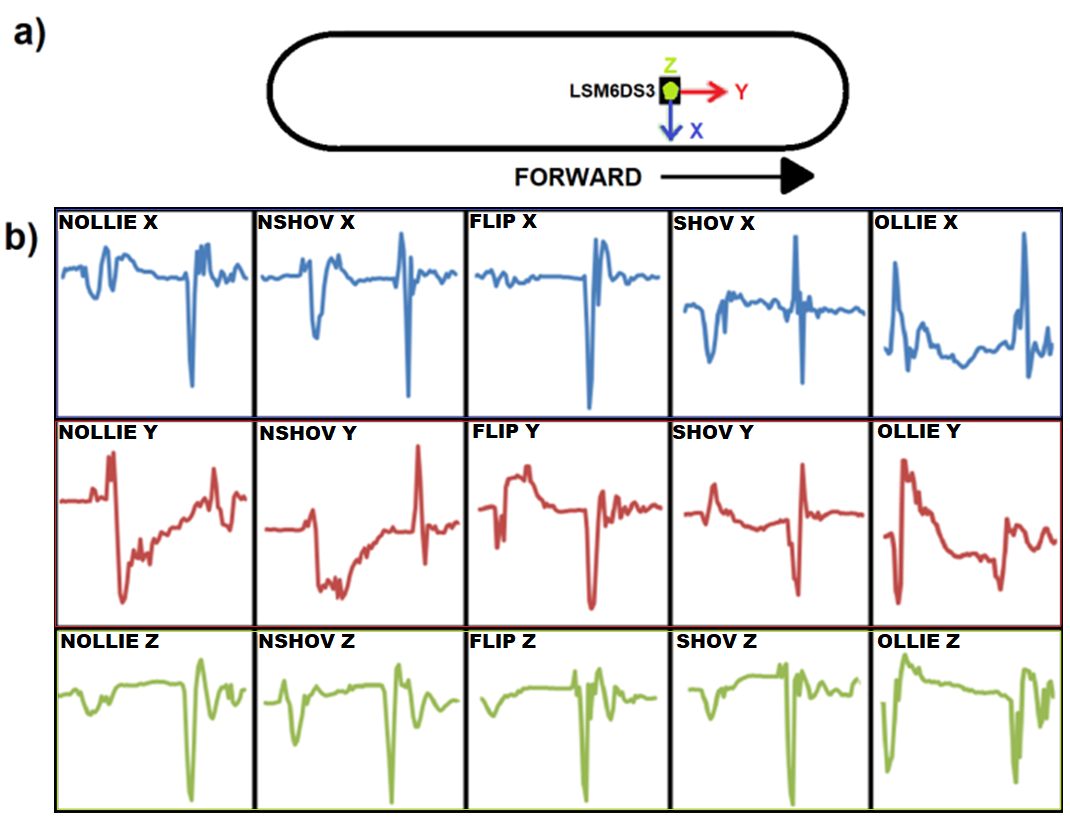

In [1]:
#MBibliotecas
import pandas as pd
import xlrd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.model_selection import train_test_split


In [2]:
x = pd.read_excel('/content/drive/MyDrive/code/data/data.xlsx')
y = pd.read_excel('/content/drive/MyDrive/code/data/target.xlsx')

#Dados como NParrays
data = x.to_numpy()
target = y.to_numpy()
data = data.astype('float32')
#Dados como PDframe
alvos = pd.DataFrame(target, columns =['Nollie', 'Nollie-Shov-It', 'Kickflip', 'Shov-It', 'Ollie'])
dados = pd.DataFrame(data)

print('Comjunto de dados: cada linha(row) é um sinal (82 pontos de aceleração) ')
print('\n')
print(dados) 
print('Alvos: cada linha é um alvo (one-hot-encoded) dentre 5 classes')
print('\n')
print(alvos)



Comjunto de dados: cada linha(row) é um sinal (82 pontos de aceleração) 


         0       1       2       3   ...      78      79      80      81
0     -13.0   -12.0    -3.0   -13.0  ...   -67.0     0.0    25.0    46.0
1   -1011.0 -1016.0  -922.0  -994.0  ... -1285.0  -276.0  -309.0  -521.0
2      31.0    30.0    34.0    34.0  ...   196.0   114.0    27.0   196.0
3      31.0    33.0    32.0    27.0  ...     0.0    41.0    61.0     0.0
4   -1005.0 -1010.0 -1009.0 -1008.0  ... -1356.0 -1402.0 -1212.0 -1356.0
..      ...     ...     ...     ...  ...     ...     ...     ...     ...
453  -976.0 -1004.0 -1016.0 -1038.0  ...  -945.0  -928.0  -919.0  -969.0
454    31.0    29.0   -93.0   -80.0  ...   170.0   220.0   199.0   -18.0
455    38.0    38.0    56.0    48.0  ...   -23.0   -33.0   -44.0   -39.0
456 -1007.0 -1034.0  -999.0 -1058.0  ...  -758.0 -1072.0 -1332.0 -1350.0
457    19.0    69.0   131.0    70.0  ...  -105.0  -151.0  -138.0   -75.0

[458 rows x 82 columns]
Alvos: cada linha é um a

Nollie (x, y, z)




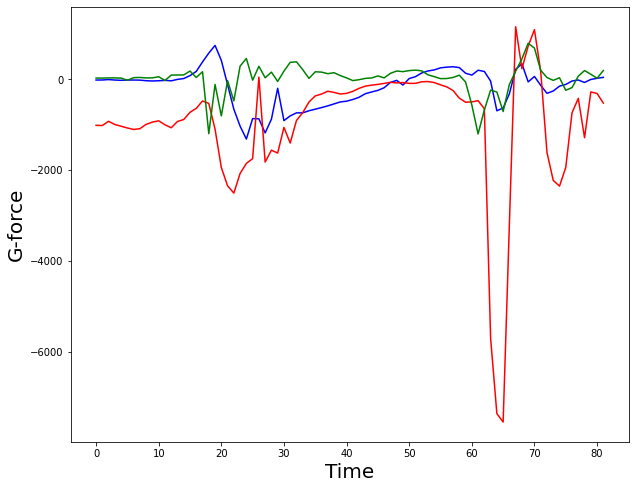



Nolie Shove It (x, y, z)




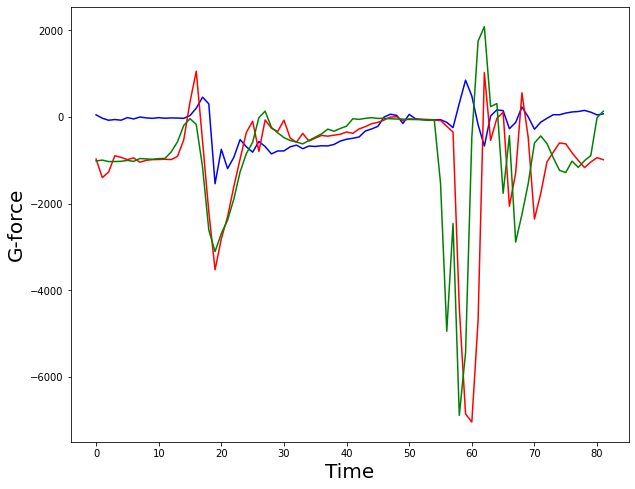



Kickflip (x, y, z)




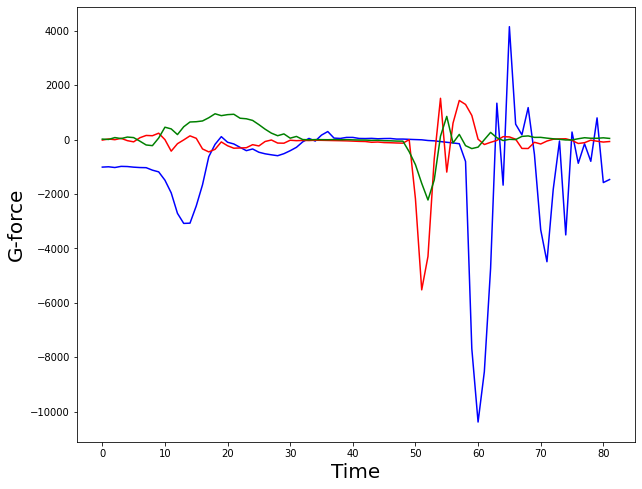



Shove It (x, y, z)




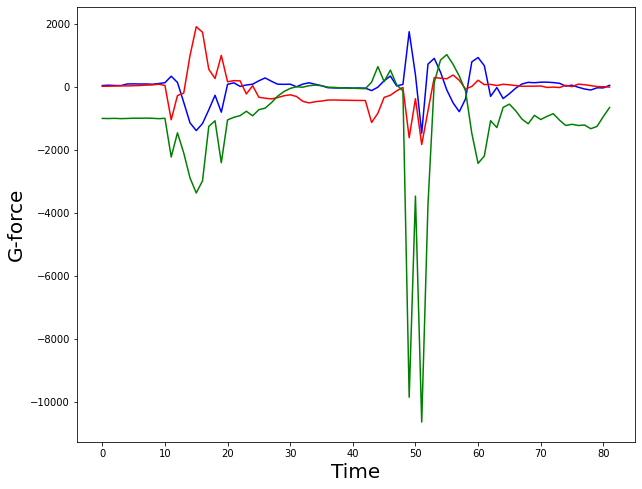



Ollie (x, y, z)




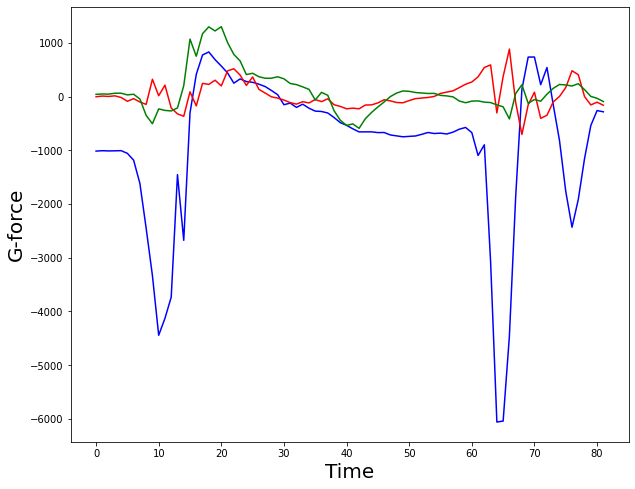

In [3]:
#Sinal Bruto


print('Nollie (x, y, z)')
print('\n')
plt.figure(figsize = (10,8))
plt.plot(data[0], 'b', data[1], 'r-', data[2], 'g')
plt.xlabel('Time', fontsize=20)
plt.ylabel('G-force', fontsize=20)
plt.show()
print('\n')
print('Nolie Shove It (x, y, z)')
print('\n')
plt.figure(figsize = (10,8))
plt.plot(data[96], 'b', data[97], 'r-', data[98], 'g')
plt.xlabel('Time', fontsize=20)
plt.ylabel('G-force', fontsize=20)
plt.show()
print('\n')
print('Kickflip (x, y, z)')
print('\n')
plt.figure(figsize = (10,8))
plt.plot(data[201], 'b', data[202], 'r-', data[203], 'g')
plt.xlabel('Time', fontsize=20)
plt.ylabel('G-force', fontsize=20)
plt.show()
print('\n')
print('Shove It (x, y, z)')
print('\n')
plt.figure(figsize = (10,8))
plt.plot(data[291], 'b', data[292], 'r-', data[293], 'g')
plt.xlabel('Time', fontsize=20)
plt.ylabel('G-force', fontsize=20)
plt.show()
print('\n')
print('Ollie (x, y, z)')
print('\n')
plt.figure(figsize = (10,8))
plt.plot(data[366], 'b', data[367], 'r-', data[368], 'g')
plt.xlabel('Time', fontsize=20)
plt.ylabel('G-force', fontsize=20)
plt.show()

In [5]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, shuffle = True) 

Agora os sinais possuem uma distribuição normalizada pelo desvio padrão: 




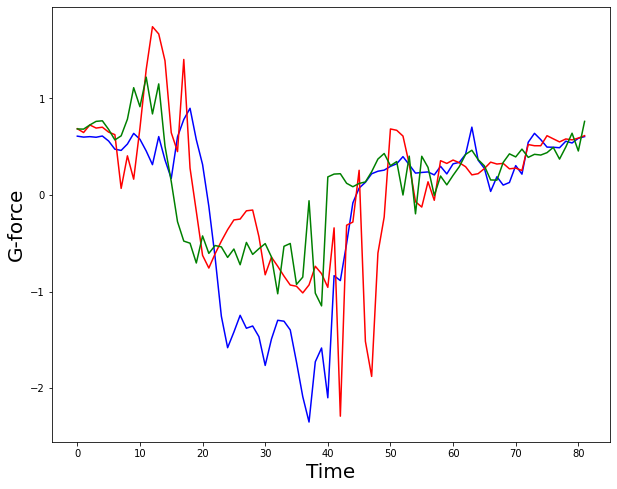

In [6]:
# Normalização

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

#Dados normalizados

print('Agora os sinais possuem uma distribuição normalizada pelo desvio padrão: ')
print('\n')
plt.figure(figsize = (10,8))
plt.plot(X_train[0], 'b', X_train[1], 'r-', X_train[2], 'g')
plt.xlabel('Time', fontsize=20)
plt.ylabel('G-force', fontsize=20)
plt.show()

In [9]:
#@title **Parâmetros (*play with them!*)**
# Camadas ocultas/taxa de aprendizagem/regularizadores/epochs/batch size
HIDDEN_LAYER_01 =  128#@param {type:"number"}
HIDDEN_LAYER_02 =  64#@param {type:"number"}
HIDDEN_LAYER_03 =  32#@param {type:"number"}
LEARNING_RATE = 0.001 #@param {type:"number"}
L1 = 0.001 #@param {type:"number"}
L2 = 0.001 #@param {type:"number"}
EPOCHS =  150 #@param {type:"number"}
BATCH = 5 #@param {type:"number"}
#Regularizadores L1 e L2, i.e., regularização por decaimento de pesos.
regularizer = tf.keras.regularizers.l1_l2(l1=L1, l2=L2)
#Modelo

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(82,)), #transforma o input 2D (28 x28) em um array 1D (28*28 = 784)
                                    tf.keras.layers.Dense(HIDDEN_LAYER_01, kernel_regularizer=regularizer, activation='relu'),#Hidden layer, onde representações são aprendidas (ReLU = rectified linear activation unit)
                                    tf.keras.layers.Dense(HIDDEN_LAYER_02, kernel_regularizer=regularizer, activation='relu'),#Hidden layer, onde representações são aprendidas (ReLU = rectified linear activation unit)
                                    tf.keras.layers.Dense(HIDDEN_LAYER_03, kernel_regularizer=regularizer, activation='relu'),#Hidden layer, onde representações são aprendidas (ReLU = rectified linear activation unit)
                                    tf.keras.layers.Dense(5, activation='softmax')])#Softmax gera uma medida de probabilidade entre as 10 classes.

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)# "Adam optimization algorithm" é uma versão adaptativa de SGD (stochastic gradient descent)
model.compile(optimizer = opt,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

'''
model.summary()
def build_model():
    model =keras.Sequential([
    keras.layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), input_shape=(82,)),
    keras.layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'),
    keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(5, activation='softmax')])
    model.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['categorical_accuracy'])

    return model   
'''

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 82)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               10624     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 21,125
Trainable params: 21,125
Non-trainable params: 0
_________________________________________________________________


In [10]:
# K-fold validation e logs de validação

import numpy as np
k = 4
num_val_samples = len(X_train) // k
num_epochs = EPOCHS
all_acc_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_X_train = np.concatenate(
        [X_train[:i * num_val_samples],
        X_train[(i + 1) * num_val_samples:]],
        axis=0)

    partial_y_train = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]],
        axis=0)

    history = model.fit(partial_X_train, partial_y_train,
                        validation_data=(val_data, val_targets),
                        epochs=EPOCHS, batch_size=BATCH, verbose=1)
    
    val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=1)

    history_dict = history.history
    history_dict.keys()

    acc = history_dict['categorical_accuracy']
    val_acc = history_dict['val_categorical_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    acc_history = history.history['categorical_accuracy']
    all_acc_histories.append(acc_history)

processing fold # 0
Epoch 1/150
55/55 [==============================] - 1s 8ms/step - loss: 3.3879 - categorical_accuracy: 0.4327 - val_loss: 3.1515 - val_categorical_accuracy: 0.4396
Epoch 2/150
55/55 [==============================] - 0s 3ms/step - loss: 2.8417 - categorical_accuracy: 0.6545 - val_loss: 2.7686 - val_categorical_accuracy: 0.6484
Epoch 3/150
55/55 [==============================] - 0s 4ms/step - loss: 2.5212 - categorical_accuracy: 0.7200 - val_loss: 2.5094 - val_categorical_accuracy: 0.7363
Epoch 4/150
55/55 [==============================] - 0s 4ms/step - loss: 2.2878 - categorical_accuracy: 0.8400 - val_loss: 2.3438 - val_categorical_accuracy: 0.7912
Epoch 5/150
55/55 [==============================] - 0s 4ms/step - loss: 2.1331 - categorical_accuracy: 0.8436 - val_loss: 2.2297 - val_categorical_accuracy: 0.7692
Epoch 6/150
55/55 [==============================] - 0s 4ms/step - loss: 1.9713 - categorical_accuracy: 0.9055 - val_loss: 2.1341 - val_categorical_accurac

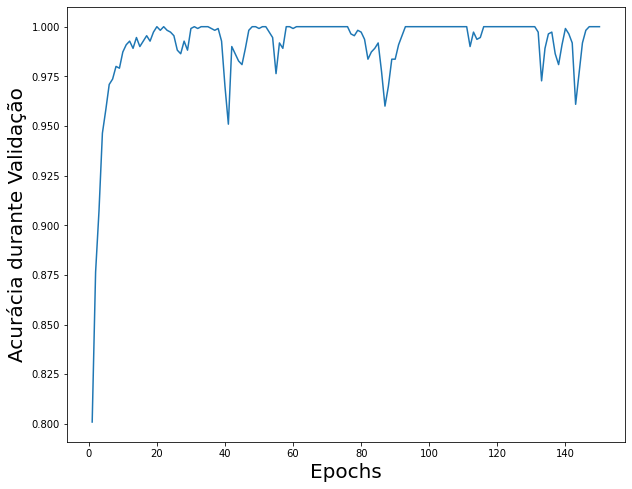

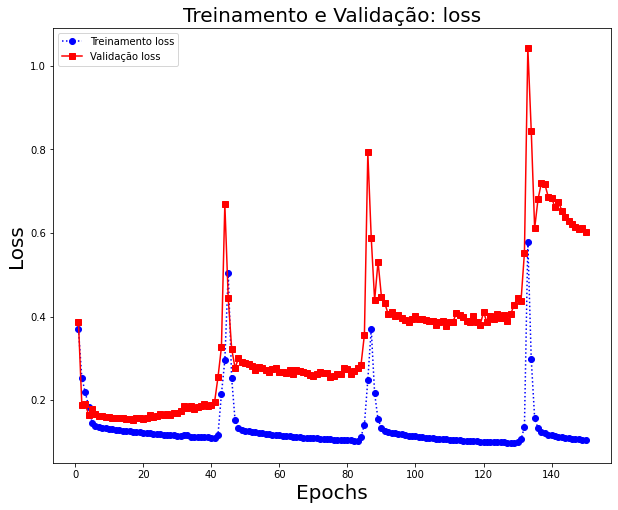

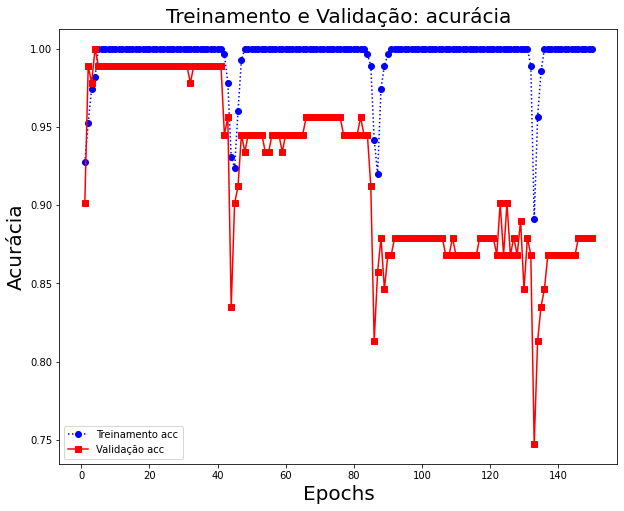

In [11]:
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]

plt.figure(figsize = (10,8))
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Acurácia durante Validação', fontsize=20)
plt.show()

#Gráficos de acurácia e loss por tempo(epoch)
history_dict.keys()

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (10,8))
plt.plot(epochs, loss, 'bo:', label='Treinamento loss')
plt.plot(epochs, val_loss, 'rs-', label='Validação loss')
plt.title('Treinamento e Validação: loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend()
plt.show()

plt.figure(figsize = (10,8))
plt.plot(epochs, acc, 'bo:', label='Treinamento acc')
plt.plot(epochs, val_acc, 'rs-', label='Validação acc')
plt.title('Treinamento e Validação: acurácia', fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Acurácia',fontsize=20)
plt.legend()

plt.show()

In [12]:
# Treinando o modelo final

model.fit(X_train, y_train,
          epochs=10, batch_size=5, verbose=1)
test_loss_score, test_acc_score = model.evaluate(X_test, y_test)

print('Test Loss score: ', test_loss_score, '.')
print('Test Acc score: ', test_acc_score, '.')



Epoch 1/10
74/74 [==============================] - 1s 3ms/step - loss: 0.2916 - categorical_accuracy: 0.9508
Epoch 2/10
74/74 [==============================] - 0s 3ms/step - loss: 0.2527 - categorical_accuracy: 0.9344
Epoch 3/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1640 - categorical_accuracy: 0.9781
Epoch 4/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1569 - categorical_accuracy: 0.9781
Epoch 5/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1276 - categorical_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1215 - categorical_accuracy: 0.9973
Epoch 7/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1204 - categorical_accuracy: 1.0000
Epoch 8/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1174 - categorical_accuracy: 1.0000
Epoch 9/10
74/74 [==============================] - 0s 3ms/step - loss: 0.1142 - categorical_accuracy: 1.0000
Epoch 10/1

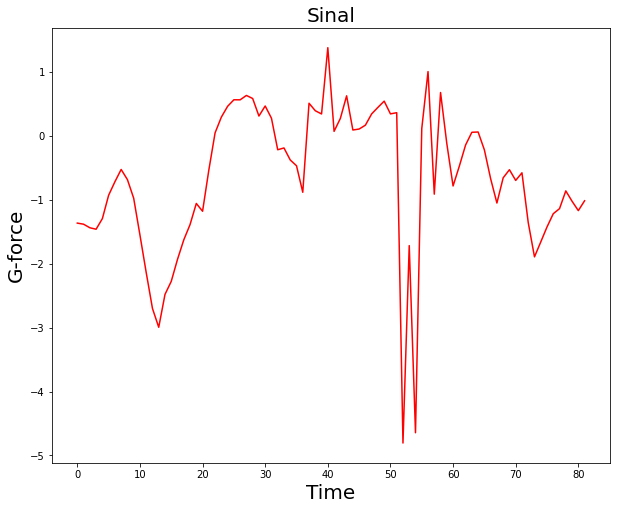

                               Nollie  Nollie-Shov-It  Kickflip  Shov-It  Ollie
Distribuição de Probabilidade   0.000           0.000     0.001    0.999  0.000
[0 0 0 1 0]


In [18]:
#@title Escolha qualquer amostra (entre 0 e 92)

pd.set_option('display.float_format','{:.3f}'.format)

predictions = model.predict(X_test)
sample =  69#@param {type:"number"}
a = predictions[sample] #Distribuição de probabilidade
df = pd.DataFrame(a, index=['Nollie', 'Nollie-Shov-It', 'Kickflip', 'Shov-It', 'Ollie'],
                  columns=['Distribuição de Probabilidade'])
df = df.transpose()


plt.figure(figsize = (10,8))
plt.plot(X_test[sample], 'r-')
plt.title('Sinal', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('G-force', fontsize=20)
plt.show()

print(df)

print(y_test[sample])